In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline

In [16]:
file = "datasetLoL\\matchinfo.csv"
dataset = pd.read_csv(file)

In [17]:
#Problema 1: Criar um dataset com todos os jogos de todas as ligas com suas correspondentes composições
matchup=pd.DataFrame(columns=['Liga','Ano','Split','Time','Top','Jungle','Mid','ADC','Suporte'])
matchup['Liga']=np.concatenate((dataset.League,dataset.League))
matchup['Ano']=np.concatenate((dataset.Year,dataset.Year))
matchup['Split']=np.concatenate((dataset.Season,dataset.Season))
matchup['Time']=np.concatenate((dataset.redTeamTag,dataset.blueTeamTag))
matchup['Top']=np.concatenate((dataset.redTopChamp,dataset.blueTopChamp))
matchup['Jungle']=np.concatenate((dataset.redJungleChamp,dataset.blueJungleChamp))
matchup['Mid']=np.concatenate((dataset.redMiddleChamp,dataset.blueMiddleChamp))
matchup['ADC']=np.concatenate((dataset.redADCChamp,dataset.blueADCChamp))
matchup['Suporte']=np.concatenate((dataset.redSupportChamp,dataset.blueSupportChamp))
matchup.head(10)

,Liga,Ano,Split,Time,Top,Jungle,Mid,ADC,Suporte
0,NALCS,2015,Spring,C9,Gnar,Elise,Fizz,Sivir,Thresh
1,NALCS,2015,Spring,DIG,Irelia,JarvanIV,Azir,Corki,Annie
2,NALCS,2015,Spring,GV,Sion,LeeSin,Azir,Corki,Janna
3,NALCS,2015,Spring,TL,Gnar,Nunu,Lulu,KogMaw,Janna
4,NALCS,2015,Spring,T8,Sion,RekSai,Lulu,Corki,Annie
5,NALCS,2015,Spring,TIP,Gnar,JarvanIV,Lulu,Corki,Thresh
6,NALCS,2015,Spring,WFX,Renekton,LeeSin,Leblanc,Tristana,Nami
7,NALCS,2015,Spring,CLG,Rumble,Rengar,Leblanc,Sivir,Blitzcrank
8,NALCS,2015,Spring,GV,Kassadin,Vi,Zed,Corki,Morgana
9,NALCS,2015,Spring,TSM,Gnar,Rengar,Leblanc,Graves,Morgana


In [18]:
#Problema 2: Match-up com os Campeões mais utilizados pela PAIN Gaming
print("Campeões mais Utilizados pela PAIN Gaming:")
print("Top:",(matchup[(matchup.Liga == 'CBLoL') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'PNG')].Top.describe().top),"||",
      "Jungle:",(matchup[(matchup.Liga == 'CBLoL') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'PNG')].Jungle.describe().top),"||",
      "Mid:",(matchup[(matchup.Liga == 'CBLoL') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'PNG')].Mid.describe().top),"||",
      "ADC:",(matchup[(matchup.Liga == 'CBLoL') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'PNG')].ADC.describe().top),"||",
      "Suporte:",(matchup[(matchup.Liga == 'CBLoL') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'PNG')].Suporte.describe().top))

Campeões mais Utilizados pela PAIN Gaming:
Top: JarvanIV || Jungle: Khazix || Mid: Syndra || ADC: Varus || Suporte: Braum


In [19]:
#Problema 3: Match-up com os Campeões mais utilizados pela SKT T1
print("Campeões mais Utilizados pela SKT T1:")
print("Top:",(matchup[(matchup.Liga == 'LCK') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'SKT')].Top.describe().top),"||",
      "Jungle:",(matchup[(matchup.Liga == 'LCK') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'SKT')].Jungle.describe().top),"||",
      "Mid:",(matchup[(matchup.Liga == 'LCK') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'SKT')].Mid.describe().top),"||",
      "ADC:",(matchup[(matchup.Liga == 'LCK') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'SKT')].ADC.describe().top),"||",
      "Suporte:",(matchup[(matchup.Liga == 'LCK') & (matchup.Ano == 2017) & (matchup.Split == 'Summer') & (matchup.Time == 'SKT')].Suporte.describe().top))

Campeões mais Utilizados pela SKT T1:
Top: Rumble || Jungle: Gragas || Mid: Taliyah || ADC: Tristana || Suporte: Alistar


In [20]:
# Estilizando os gráficos
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

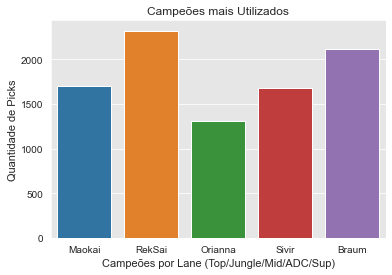

In [21]:
#Problema 4: Match-up com os Campeões mais utilizados em todo o Competitivo de LoL (2015 a 2018)
champions = [matchup.Top.describe().top,matchup.Jungle.describe().top,matchup.Mid.describe().top,matchup.ADC.describe().top,matchup.Suporte.describe().top]
picks = [matchup.Top.describe().freq,matchup.Jungle.describe().freq,matchup.Mid.describe().freq,matchup.ADC.describe().freq,matchup.Suporte.describe().freq]
sns.barplot(champions, picks)
plt.title("Campeões mais Utilizados", fontsize=12)
plt.xlabel("Campeões por Lane (Top/Jungle/Mid/ADC/Sup)", fontsize=11)
plt.ylabel("Quantidade de Picks", fontsize=11)
plt.show()

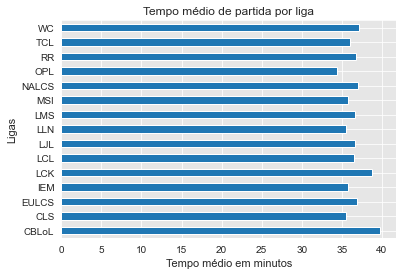

In [22]:
#Problema 5: Tempo médio de partida por liga
dataset.groupby('League').gamelength.mean().plot(kind='barh')
plt.title('Tempo médio de partida por liga', fontsize=12)
plt.xlabel('Tempo médio em minutos', fontsize=11)
plt.ylabel('Ligas', fontsize=11)
plt.show()

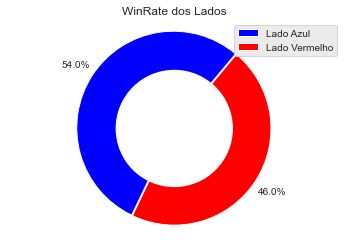

In [23]:
#Problema 6: WinRate (percentual de vitórias) do lado Vermelho e lado Azul referente ao Competitivo de 2015 a 2018
pazul = '{:2.2}'.format(dataset.bResult.mean())
pvermelho = '{:2.2}'.format(dataset.rResult.mean())
explode = (0.01, 0)
labels=['Lado Azul', 'Lado Vermelho']
plt.pie([pazul,pvermelho], colors=['blue', 'red'], autopct='%1.1f%%', explode=explode, startangle=50, pctdistance=1.2)
plt.legend(labels, loc=1)
plt.title('WinRate dos Lados',fontsize=12)
centre_circle = plt.Circle((0,0),0.6,fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

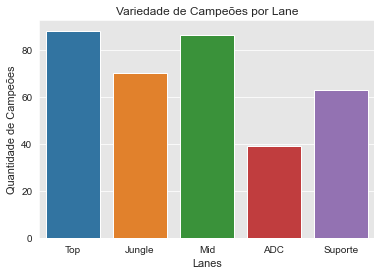

In [24]:
#Problema 7: Quantidade de campeões diferentes utilizados em cada lane
top=matchup.Top.describe()
jg=matchup.Jungle.describe()
mid=matchup.Mid.describe()
adc=matchup.ADC.describe()
sup=matchup.Suporte.describe()
sns.barplot(['Top','Jungle','Mid','ADC','Suporte'], [top['unique'],jg['unique'],mid['unique'],adc['unique'],sup['unique']])
plt.xlabel('Lanes',fontsize=11)
plt.ylabel('Quantidade de Campeões',fontsize=11)
plt.title('Variedade de Campeões por Lane',fontsize=12)
plt.show()